In [56]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import os
from pathlib import Path
import glob
from random import shuffle
import re
import cv2 as cv
import keras
import tensorflow as tf
from keras.utils import load_img, img_to_array
from PIL import Image, ImageChops
from keras.preprocessing.image import ImageDataGenerator
import random
import shutil
from sklearn.model_selection import train_test_split

# Load VGG16 model

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Model
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import BatchNormalization

In [57]:
# Size of the output images (after resizing) and number of channels
output_image_size = (224, 224)
output_image_chanels = 3
output_image_shape = (output_image_size[0], output_image_size[1], 3)

In [58]:
print(Path.cwd())
if not os.path.exists('input'):
    # Import dataset
    os.chdir("../")
    print(Path.cwd())
    print(os.listdir())

c:\Users\r\Desktop\Work\Python\Practice


In [59]:
input_data = Path('input/chest_xray/chest_xray')

train_directory = input_data / 'train'
test_directory = input_data / 'test'
validation_directory = input_data / 'val'

train_normal_directory = train_directory / 'NORMAL'
train_pneumonia_directory = train_directory / 'PNEUMONIA'

test_normal_directory = test_directory / 'NORMAL'
test_pneumonia_directory = test_directory / 'PNEUMONIA'

validation_normal_directory = validation_directory / 'NORMAL'
validation_pneumonia_directory = validation_directory / 'PNEUMONIA'

print(train_normal_directory)
print(test_normal_directory)
print(validation_normal_directory)

input\chest_xray\chest_xray\train\NORMAL
input\chest_xray\chest_xray\test\NORMAL
input\chest_xray\chest_xray\val\NORMAL


In [60]:
def images_and_labels(list_of_directories: list, label):
    list_of_images = []
    for directory in list_of_directories:
        for img in directory.glob('*.jpeg'):
            if re.search('virus', img.name.lower()):
                list_of_images.append((os.path.abspath(img), 'virus', label))

            elif re.search('bacteria', img.name.lower()):
                list_of_images.append((os.path.abspath(img), 'bacteria', label))
            else:
                list_of_images.append((os.path.abspath(img), 'normal', label))

    return list_of_images

In [61]:
# normal cases are labeled 0
list_of_normal_cases = images_and_labels([train_normal_directory, 
                                          test_normal_directory, validation_normal_directory], 0)

# pneumonia cases are labeled 1
list_of_pneumonia_cases = images_and_labels([train_pneumonia_directory, 
                                             test_pneumonia_directory, validation_pneumonia_directory], 1)

random.seed(42)
random.shuffle(list_of_normal_cases)
random.shuffle(list_of_pneumonia_cases)

In [62]:
print(len(list_of_normal_cases), len(list_of_pneumonia_cases), "\n")
print(list_of_normal_cases[0], "\n", list_of_pneumonia_cases[0], "\n")
print(len(list_of_normal_cases[0]))

1583 4273 

('c:\\Users\\r\\Desktop\\Work\\Python\\Practice\\input\\chest_xray\\chest_xray\\train\\NORMAL\\IM-0702-0001.jpeg', 'normal', 0) 
 ('c:\\Users\\r\\Desktop\\Work\\Python\\Practice\\input\\chest_xray\\chest_xray\\train\\PNEUMONIA\\person433_bacteria_1875.jpeg', 'bacteria', 1) 

3


In [63]:
# Create dataframe
df = pd.DataFrame(list_of_normal_cases + list_of_pneumonia_cases, columns=['image', 'description', 'label'])

In [64]:
# get statistics of the dataframe
print(df.head())

                                               image description  label
0  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
1  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
2  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
3  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
4  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0


In [65]:
print(df.tail())

                                                  image description  label
5851  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
5852  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1
5853  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
5854  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1
5855  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1


In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        5856 non-null   object
 1   description  5856 non-null   object
 2   label        5856 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 137.4+ KB
None


In [67]:
print(df.describe())

             label
count  5856.000000
mean      0.729679
std       0.444164
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


In [68]:
print(df['label'].value_counts())

1    4273
0    1583
Name: label, dtype: int64


In [69]:
print(df['label'].value_counts(normalize=True))

1    0.729679
0    0.270321
Name: label, dtype: float64


In [70]:
print(df['description'].value_counts())

bacteria    2780
normal      1583
virus       1493
Name: description, dtype: int64


In [71]:
print(df['description'].value_counts(normalize=True))

bacteria    0.474727
normal      0.270321
virus       0.254952
Name: description, dtype: float64


In [72]:
print(df.isnull().sum())

image          0
description    0
label          0
dtype: int64


In [73]:
print(df.isna().sum())

image          0
description    0
label          0
dtype: int64


In [74]:
print(df.sample(5))

                                                  image description  label
70    c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
1451  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
4618  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1
5183  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1
4177  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1


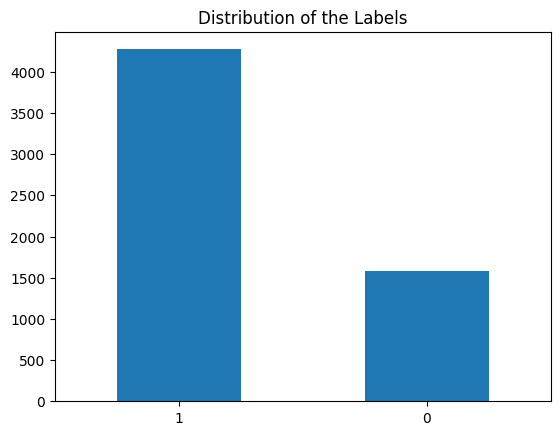

In [75]:
# Plot the distribution of the labels
df['label'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of the Labels')
plt.show()

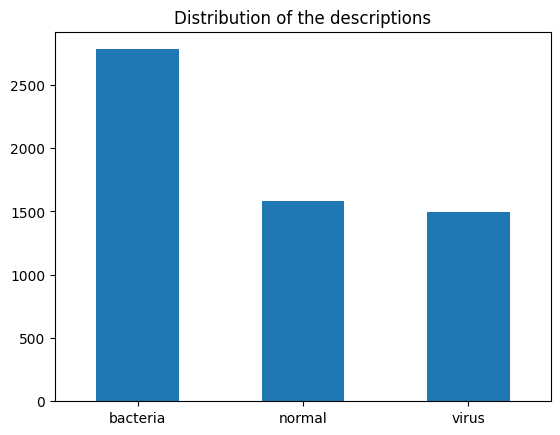

In [76]:
# Plot the distribution of the descriptions
df['description'].value_counts().plot(kind='bar', rot=0)
plt.title('Distribution of the descriptions')
plt.show()

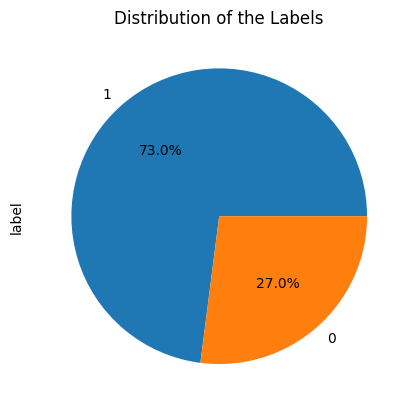

In [77]:
# Pie chart of the distribution of the labels
df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of the Labels')
plt.show()

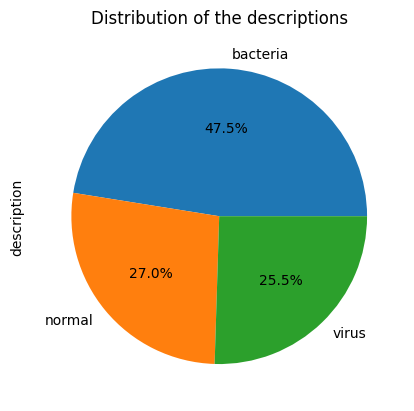

In [78]:
# Pie chart of the distribution of the descriptions
df['description'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of the descriptions')
plt.show()

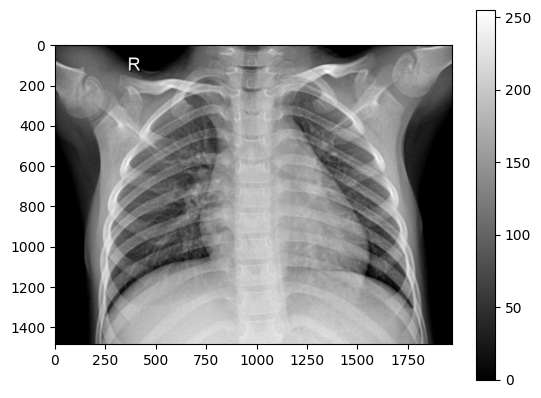

In [79]:
# Pixel distribution of the images
img = plt.imread(df['image'][0])
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

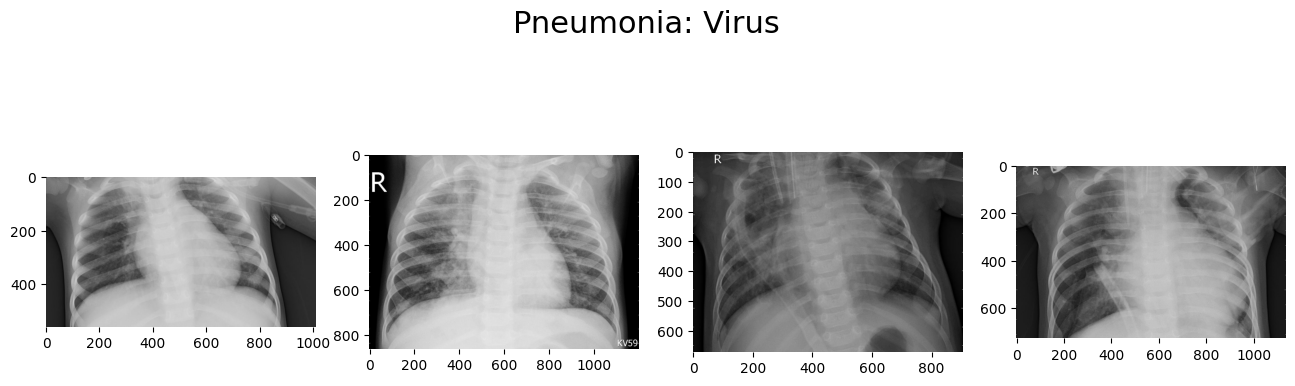

In [80]:
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Pneumonia: Virus', size=22)

for i, img in enumerate(df[df['description'] == 'virus']['image'][:4]):
    img = plt.imread(img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

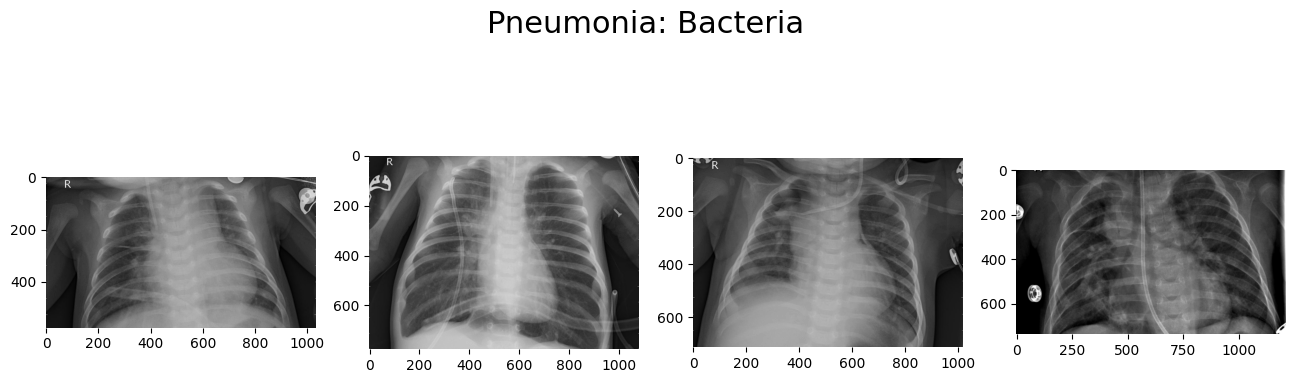

In [81]:
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Pneumonia: Bacteria', size=22)

for i, img in enumerate(df[df['description'] == 'bacteria']['image'][:4]):
    img = plt.imread(img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

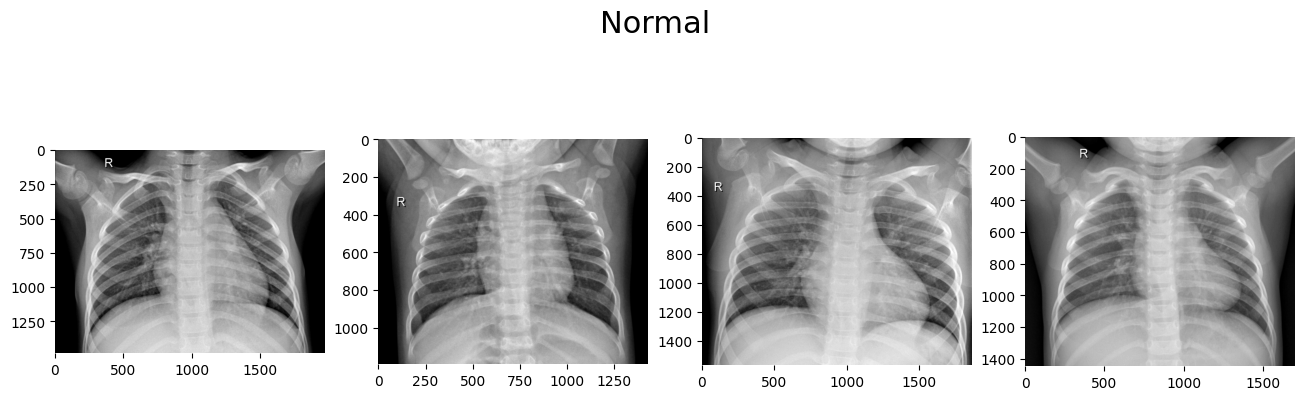

In [82]:
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Normal', size=22)

for i, img in enumerate(df[df['description'] == 'normal']['image'][:4]):
    img = plt.imread(img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

In [83]:
def resize_images(input_list: list, size_of_images: tuple):

    if input_list == []:
        print("Input list is empty")
        return

    if size_of_images[0] <= 0 or size_of_images[1] <= 0:
        print("Size of images is invalid")
        return
    
    if len(input_list[0]) != 3:
        print("Input list elements should have 3 attributes")
        return

    resized_images = []
    errors = []
    for i in range(len(input_list)):
        try:
            img_array = cv.imread(input_list[i][0], cv.IMREAD_GRAYSCALE)
            
            if output_image_chanels == 3:
                img_array = cv.cvtColor(img_array, cv.COLOR_GRAY2RGB)

            resized_image = cv.resize(img_array, size_of_images)
            resized_images.append([resized_image, input_list[i][1], input_list[i][2]])
        except Exception as e:
            print(e)
            errors.append([input_list[i][0], input_list[i][1], input_list[i][2]])
            resized_images.append([None, input_list[i][1], input_list[i][2]])
            continue 
    
    
    print("Resizing finished")
    print("Number of images: ", len(resized_images))
    print("Shape of images: ", resized_images[0][0].shape)
    print("Number of errors: ", len(errors))
    print("Errors: ", errors)

    for i in range(len(errors)):
        print(errors[i][0], errors[i][1], errors[i][2])

    return resized_images

In [84]:
print(list_of_normal_cases[0][0])
print(list_of_normal_cases[0][1])
print(list_of_normal_cases[0][2])

normal_cases = resize_images(list_of_normal_cases, output_image_size)
pneumonia_cases = resize_images(list_of_pneumonia_cases, output_image_size)

c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray\chest_xray\train\NORMAL\IM-0702-0001.jpeg
normal
0
Resizing finished
Number of images:  1583
Shape of images:  (224, 224, 3)
Number of errors:  0
Errors:  []
Resizing finished
Number of images:  4273
Shape of images:  (224, 224, 3)
Number of errors:  0
Errors:  []


In [85]:
print(normal_cases[0][1])
print(normal_cases[0][2])

normal
0


In [86]:
resized_images_directory = Path('input/chest_xray_resized').absolute()
resized_images_directory.mkdir(exist_ok=True)

normal_resized_directory = resized_images_directory / 'Normal'
normal_resized_directory.mkdir(exist_ok=True)

pneumonia_resized_directory = resized_images_directory / 'Pneumonia'
pneumonia_resized_directory.mkdir(exist_ok=True)

In [87]:
print("normal_dir: ", normal_resized_directory)
print("pneumonia_dir: ", pneumonia_resized_directory)
print(f"{normal_resized_directory}/{normal_cases[0][1]}_{normal_cases[0][2]}.jpeg")
print(len(normal_cases))
print(f"{pneumonia_resized_directory}/{pneumonia_cases[0][1]}_{pneumonia_cases[0][2]}.jpeg")

normal_dir:  c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized\Normal
pneumonia_dir:  c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized\Pneumonia
c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized\Normal/normal_0.jpeg
1583
c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized\Pneumonia/bacteria_1.jpeg


In [88]:
for i in range(len(normal_cases)):
    if not cv.imwrite(f"{normal_resized_directory}\IMG{i}_{normal_cases[i][1]}_{normal_cases[i][2]}.jpeg", normal_cases[i][0]):
        raise Exception(f"Could not write image: {normal_resized_directory}\IMG{i}_{normal_cases[i][1]}_{normal_cases[i][2]}.jpeg")

In [89]:
for i in range(len(pneumonia_cases)):
    if not cv.imwrite(f"{pneumonia_resized_directory}\IMG{i}_{pneumonia_cases[i][1]}_{pneumonia_cases[i][2]}.jpeg", pneumonia_cases[i][0]):
        raise Exception(f"Could not write image: {pneumonia_resized_directory}\IMG{i}_{pneumonia_cases[i][1]}_{pneumonia_cases[i][2]}.jpeg")

In [90]:
list_of_normal_cases_resized = images_and_labels([normal_resized_directory], 0)

# pneumonia cases are labeled 1
list_of_pneumonia_cases_resized = images_and_labels([pneumonia_resized_directory], 1)

print("Number of normal cases: ", len(list_of_normal_cases_resized))
print("Number of pneumonia cases: ", len(list_of_pneumonia_cases_resized))

Number of normal cases:  1583
Number of pneumonia cases:  4273


In [91]:
# Create dataframe from resized images
df_new = pd.DataFrame(list_of_normal_cases_resized + list_of_pneumonia_cases_resized, columns=['image', 'description', 'label'])

In [92]:
print(df_new.head())

                                               image description  label
0  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
1  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
2  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
3  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
4  c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0


In [93]:
print(df_new.tail())

                                                  image description  label
5851  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
5852  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
5853  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1
5854  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
5855  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1


In [94]:
print(df_new.sample(5))

                                                  image description  label
787   c:\Users\r\Desktop\Work\Python\Practice\input\...      normal      0
4532  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
3852  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1
4858  c:\Users\r\Desktop\Work\Python\Practice\input\...       virus      1
1796  c:\Users\r\Desktop\Work\Python\Practice\input\...    bacteria      1


In [95]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image        5856 non-null   object
 1   description  5856 non-null   object
 2   label        5856 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 137.4+ KB
None


In [96]:
print(df_new.describe())

             label
count  5856.000000
mean      0.729679
std       0.444164
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000


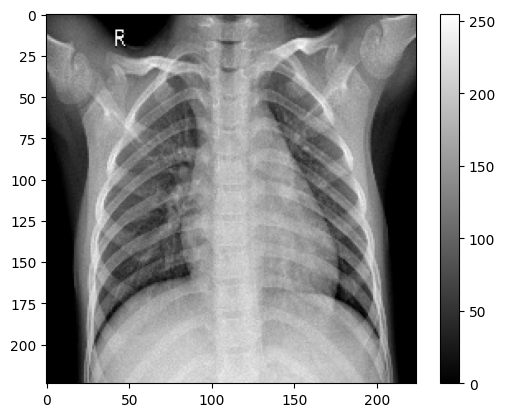

In [97]:
# Pixel distribution of the images
img = plt.imread(df_new['image'][0])
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

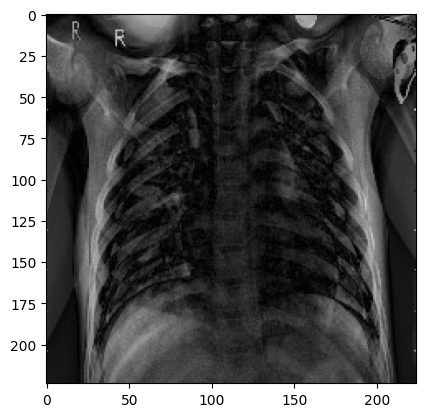

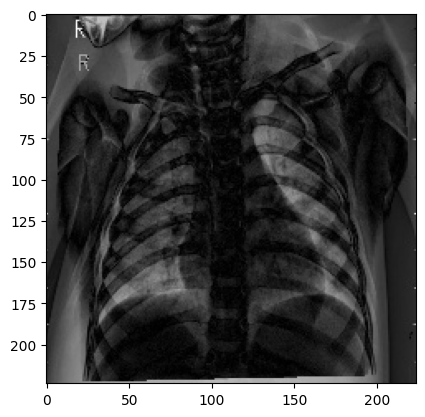

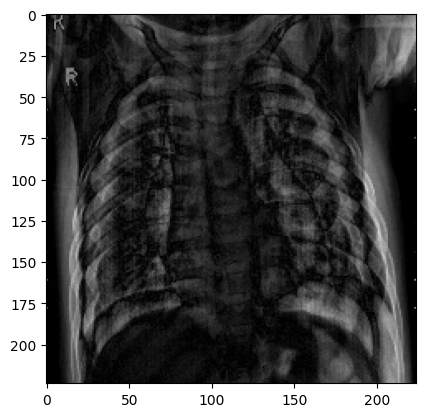

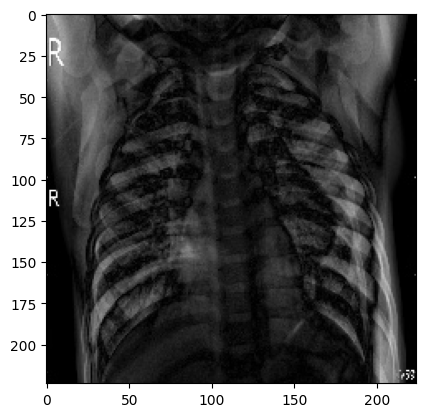

In [98]:
# Finding difference between the normal and pneumonia cases
diff_directory = Path('input/diff_images').absolute()
diff_directory.mkdir(exist_ok=True)

for i in range(4):
    img1 = Image.open(list_of_normal_cases_resized[i][0])
    img2 = Image.open(list_of_pneumonia_cases_resized[i][0])

    diff = ImageChops.difference(img1, img2)

    diff.save(f"{diff_directory}/diff{i}.png")
    plt.imshow(plt.imread(f"{diff_directory}/diff{i}.png"))
    plt.show()

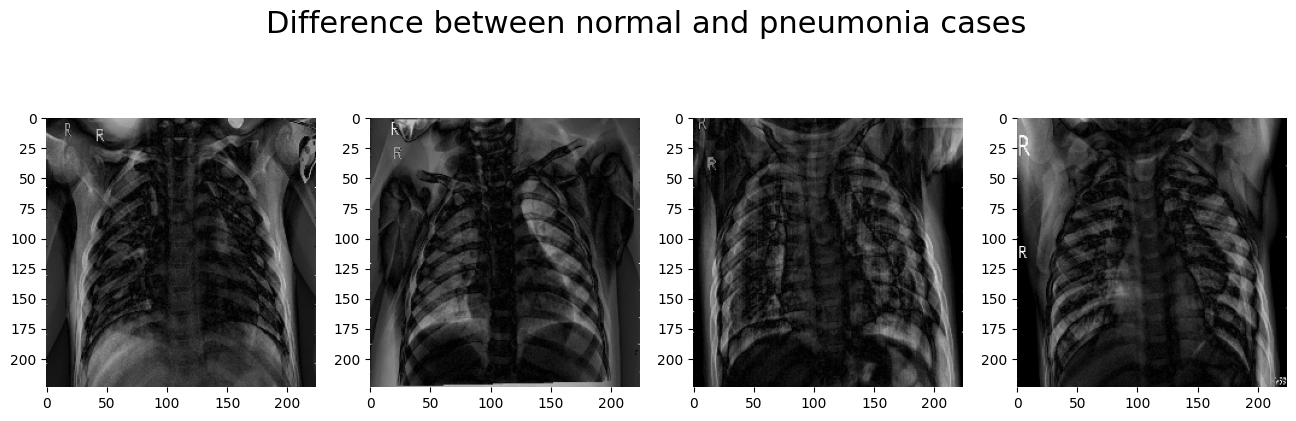

In [99]:
# Show a subplot of 4 images with differences between normal and pneumonia cases
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Difference between normal and pneumonia cases', size=22)

for i, img in enumerate(os.listdir(diff_directory)[:4]):
    img = plt.imread(diff_directory / img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img)
plt.show()

In [100]:
def show_pixel_distribution(sample_normal_img, title, combined=False):

    sns.distplot(sample_normal_img.ravel(),
                label=f"Pixel Mean {np.mean(sample_normal_img):.4f} and Standard Deviation {np.std(sample_normal_img):.4f}", kde=False)
    plt.legend(loc='upper center')
    plt.title(f'Distribution of Pixel Intensities in the {title} Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('# Pixels in Image')

    if not combined:
        plt.show()

<ipython-input-100-9ac716c34f12>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_normal_img.ravel(),


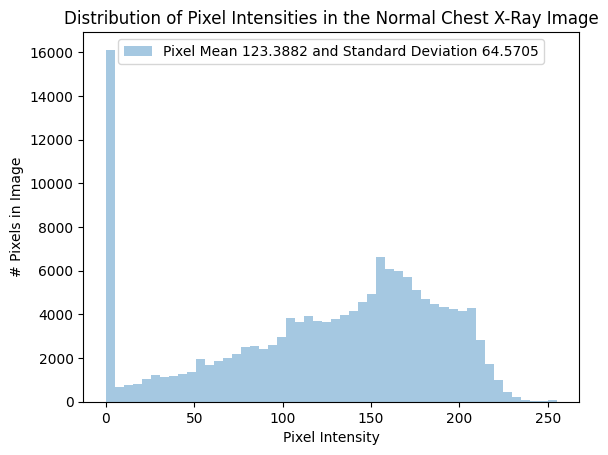

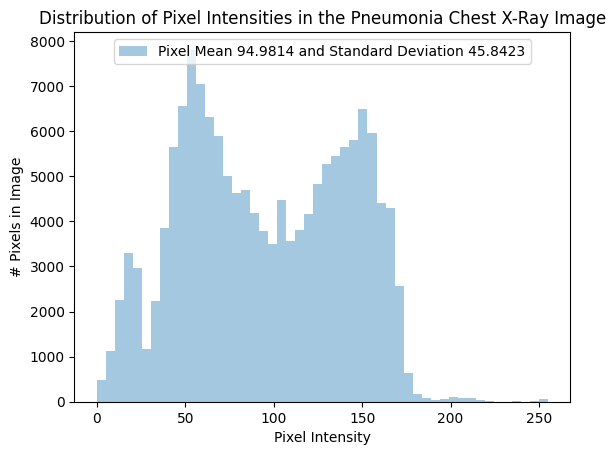

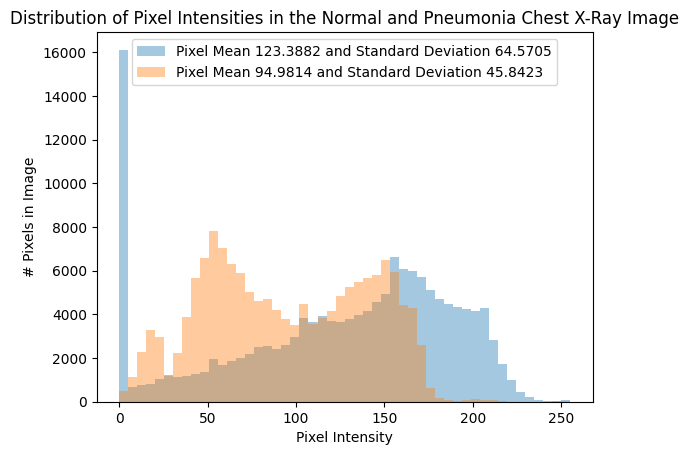

In [101]:
sample_normal_img = plt.imread(list_of_normal_cases_resized[0][0])
sample_pneumonia_img = plt.imread(list_of_pneumonia_cases_resized[0][0])

show_pixel_distribution(sample_normal_img, 'Normal Chest X-Ray')
show_pixel_distribution(sample_pneumonia_img, 'Pneumonia Chest X-Ray')


show_pixel_distribution(sample_normal_img, 'Normal and Pneumonia Chest X-Ray', combined=True)
show_pixel_distribution(sample_pneumonia_img, 'Normal and Pneumonia Chest X-Ray', combined=True)
plt.show()

In [102]:
# Augmenting normal images
normal_augmented_directory = resized_images_directory / 'Normal_Augmented'
normal_augmented_directory.mkdir(exist_ok=True)
print(normal_augmented_directory)

image_generator = ImageDataGenerator(rotation_range=10, 
                                     width_shift_range=0.1, 
                                     height_shift_range=0.1, 
                                     shear_range=0.1,
                                     zoom_range=0.1,
                                     samplewise_center=True,
                                     samplewise_std_normalization=True)

c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized\Normal_Augmented


In [103]:
print(normal_resized_directory)
path = Path(normal_resized_directory).parent.absolute()
print(path)

c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized\Normal
c:\Users\r\Desktop\Work\Python\Practice\input\chest_xray_resized


In [104]:
# Augmenting normal images
# You need to put normal image folder inside a normal_augmented_directory
# because generator looks for the folder inside the directory

# Copy normal images folder to normal_augmented_directory
shutil.copytree(normal_resized_directory, normal_augmented_directory / 'Normal', dirs_exist_ok=True)

WindowsPath('c:/Users/r/Desktop/Work/Python/Practice/input/chest_xray_resized/Normal_Augmented/Normal')

In [105]:
normal_generated = image_generator.flow_from_directory(
    normal_augmented_directory,
    batch_size=20,
    save_to_dir=normal_augmented_directory,
    save_prefix='aug_',
    save_format='jpeg',
    class_mode='input',
    shuffle=True,
    target_size=output_image_size
)

Found 1583 images belonging to 1 classes.


In [106]:
normal_generated.next()

(array([[[[-1.398378  , -1.398378  , -1.398378  ],
          [-1.493864  , -1.493864  , -1.493864  ],
          [-1.4816858 , -1.4816858 , -1.4816858 ],
          ...,
          [-1.649095  , -1.649095  , -1.649095  ],
          [-1.649095  , -1.649095  , -1.649095  ],
          [-1.649095  , -1.649095  , -1.649095  ]],
 
         [[-1.3857127 , -1.3857127 , -1.3857127 ],
          [-1.4951972 , -1.4951972 , -1.4951972 ],
          [-1.4816858 , -1.4816858 , -1.4816858 ],
          ...,
          [-1.649095  , -1.649095  , -1.649095  ],
          [-1.649095  , -1.649095  , -1.649095  ],
          [-1.649095  , -1.649095  , -1.649095  ]],
 
         [[-1.3730476 , -1.3730476 , -1.3730476 ],
          [-1.4965303 , -1.4965303 , -1.4965303 ],
          [-1.4816858 , -1.4816858 , -1.4816858 ],
          ...,
          [-1.649095  , -1.649095  , -1.649095  ],
          [-1.649095  , -1.649095  , -1.649095  ],
          [-1.649095  , -1.649095  , -1.649095  ]],
 
         ...,
 
         [[-

In [107]:
# Removing normal images from normal_augmented_directory
shutil.rmtree(normal_augmented_directory / 'Normal')

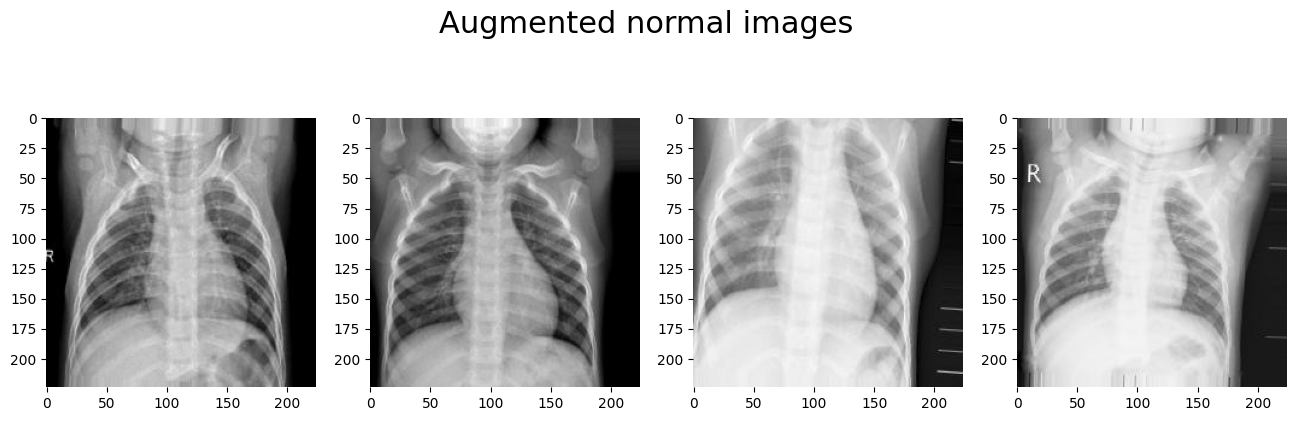

In [108]:
# Show augmented images
fig = plt.figure(figsize=(16, 5))
fig.suptitle('Augmented normal images', size=22)

for i, img in enumerate(os.listdir(normal_augmented_directory)[:4]):
    img = plt.imread(normal_augmented_directory / img)
    plt.subplot(1, 4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
plt.show()

In [109]:
def load_image_as_np_array(img_url):
    img = cv.imread(img_url)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img, output_image_size)
    img = img.astype('float32')
    img /= 255
    return img

In [110]:
# Create train and test data

# from images to RGB numpy array 
list_of_normal_cases_resized_images_np = list()
list_of_normal_cases_resized_labels_np = list()
for i in range(len(list_of_normal_cases_resized)):
    list_of_normal_cases_resized_images_np.append(load_image_as_np_array(list_of_normal_cases_resized[i][0]))
    list_of_normal_cases_resized_labels_np.append(list_of_normal_cases_resized[i][2])

list_of_pneumonia_cases_resized_images_np = list()
list_of_pneumonia_cases_resized_labels_np = list()

for i in range(len(list_of_pneumonia_cases_resized)):
    
    list_of_pneumonia_cases_resized_images_np.append(load_image_as_np_array(list_of_pneumonia_cases_resized[i][0]))
    list_of_pneumonia_cases_resized_labels_np.append(list_of_pneumonia_cases_resized[i][2])

print(f"length of image list of normal cases: {len(list_of_normal_cases_resized_images_np)}", f"length of labels of normal cases: {len(list_of_normal_cases_resized_labels_np)}")
print(f"length of image list of pneumonia cases: {len(list_of_pneumonia_cases_resized_images_np)}", f"length of labels of pneumonia cases: {len(list_of_pneumonia_cases_resized_labels_np)}")
print("Sample image shape:", list_of_normal_cases_resized_images_np[0].shape)
print("Sample image: ", list_of_normal_cases_resized_images_np[0])

length of image list of normal cases: 1583 length of labels of normal cases: 1583
length of image list of pneumonia cases: 4273 length of labels of pneumonia cases: 4273
Sample image shape: (224, 224, 3)
Sample image:  [[[0.19215687 0.19215687 0.19215687]
  [0.20784314 0.20784314 0.20784314]
  [0.2        0.2        0.2       ]
  ...
  [0.7372549  0.7372549  0.7372549 ]
  [0.627451   0.627451   0.627451  ]
  [0.50980395 0.50980395 0.50980395]]

 [[0.23137255 0.23137255 0.23137255]
  [0.22352941 0.22352941 0.22352941]
  [0.22745098 0.22745098 0.22745098]
  ...
  [0.5411765  0.5411765  0.5411765 ]
  [0.5176471  0.5176471  0.5176471 ]
  [0.4745098  0.4745098  0.4745098 ]]

 [[0.21568628 0.21568628 0.21568628]
  [0.22352941 0.22352941 0.22352941]
  [0.22352941 0.22352941 0.22352941]
  ...
  [0.5411765  0.5411765  0.5411765 ]
  [0.50980395 0.50980395 0.50980395]
  [0.49411765 0.49411765 0.49411765]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.      

In [111]:
# Transform labels to numpy array
print("Sample label shape:", len(list_of_normal_cases_resized_labels_np))
print("Sample label: ", list_of_normal_cases_resized_labels_np[0])

list_of_normal_cases_resized_labels_np = np.array(list_of_normal_cases_resized_labels_np)
list_of_pneumonia_cases_resized_labels_np = np.array(list_of_pneumonia_cases_resized_labels_np)

print("\nNormal Cases")
print(f"Type of list_of_normal_cases_resized_labels_np: {type(list_of_normal_cases_resized_labels_np)}")
print("Sample label shape:", list_of_normal_cases_resized_labels_np.shape)
print("Sample label: ", list_of_normal_cases_resized_labels_np[0])
print("Sample label: ", list_of_normal_cases_resized_labels_np[-1])

print("\nPneumonia Cases")
print(f"Type of list_of_pneumonia_cases_resized_labels_np: {type(list_of_pneumonia_cases_resized_labels_np)}")
print("Sample label shape:", list_of_pneumonia_cases_resized_labels_np.shape)
print("Sample label: ", list_of_pneumonia_cases_resized_labels_np[0])
print("Sample label: ", list_of_pneumonia_cases_resized_labels_np[-1])

Sample label shape: 1583
Sample label:  0

Normal Cases
Type of list_of_normal_cases_resized_labels_np: <class 'numpy.ndarray'>
Sample label shape: (1583,)
Sample label:  0
Sample label:  0

Pneumonia Cases
Type of list_of_pneumonia_cases_resized_labels_np: <class 'numpy.ndarray'>
Sample label shape: (4273,)
Sample label:  1
Sample label:  1


In [112]:
list_of_all_cases_resized_images_np = np.concatenate((list_of_normal_cases_resized_images_np, list_of_pneumonia_cases_resized_images_np), axis=0)
list_of_all_cases_resized_labels_np = np.concatenate((list_of_normal_cases_resized_labels_np, list_of_pneumonia_cases_resized_labels_np), axis=0)

print("\nAll Cases")
print(f"Type of list_of_all_cases_resized_images_np: {type(list_of_all_cases_resized_images_np)}")
print("Shape of list_of_all_cases_resized_images_np:", list_of_all_cases_resized_images_np.shape)
print("Shape of list_of_all_cases_resized_labels_np:", list_of_all_cases_resized_labels_np.shape)
print("Sample label: ", list_of_all_cases_resized_labels_np[0])


All Cases
Type of list_of_all_cases_resized_images_np: <class 'numpy.ndarray'>
Shape of list_of_all_cases_resized_images_np: (5856, 224, 224, 3)
Shape of list_of_all_cases_resized_labels_np: (5856,)
Sample label:  0


In [113]:
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=output_image_shape)

In [114]:
flat1 = Flatten()(vgg16_model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=vgg16_model.inputs, outputs=output)
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                             

In [115]:
for i in range(7):
    print(i, vgg16_model.layers[i].name)
    vgg16_model.layers[i].trainable = False

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool


In [116]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [117]:
flat1 = Flatten()(vgg16_model.layers[-1].output)
class1 = Dense(256, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=vgg16_model.inputs, outputs=output)
print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                           

In [119]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [120]:
# Split data into train and test. Here
X_train, X_test, y_train, y_test = train_test_split(list_of_all_cases_resized_images_np, list_of_all_cases_resized_labels_np, test_size=0.2, random_state=42)

In [121]:
for i in range(10):
    print(i, vgg16_model.layers[i].name)
    vgg16_model.layers[i].trainable = False

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3


In [122]:
# Compile the model
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [123]:
# Split data into train and test. Here
X_train, X_test, y_train, y_test = train_test_split(list_of_all_cases_resized_images_np, list_of_all_cases_resized_labels_np, test_size=0.2, random_state=42)

In [124]:
history_vgg16 = model.fit(x=X_train, y=y_train, epochs=2, validation_data=(X_test, y_test), batch_size=16)

Epoch 1/2
293/293 [==============================] - 2258s 8s/step - loss: 0.5005 - accuracy: 0.8104 - val_loss: 0.2554 - val_accuracy: 0.9087
Epoch 2/2
293/293 [==============================] - 2348s 8s/step - loss: 0.2078 - accuracy: 0.9187 - val_loss: 0.2341 - val_accuracy: 0.9317


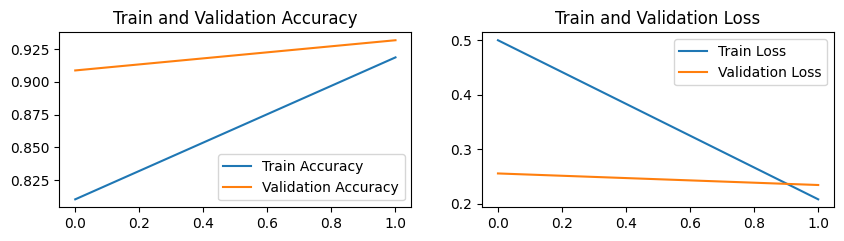

In [128]:
# Plot training and validation results
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(history_vgg16.history['loss'], label='Train Loss')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Validation Loss')

plt.show()

In [130]:
# evaluate model
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy on test set: {:.2f}%".format(acc*100))

Accuracy on test set: 93.17%


In [131]:
# evaluate model on training
_, acc = model.evaluate(X_train, y_train, verbose=0)

print("Accuracy on train set: {:.2f}%".format(acc*100))

Accuracy on train set: 93.17%


In [132]:
predictions = model.predict(X_test)
predictions = np.round(predictions)

37/37 [==============================] - 279s 8s/step


In [133]:
print("Predictions shape:", predictions.shape)
print("Predictions[:10]: ", predictions[:10])

Predictions shape: (1172, 1)
Predictions[:10]:  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [134]:
print("y_test shape:", y_test.shape)
print("y_test[:10]: ", y_test[:10])

y_test shape: (1172,)
y_test[:10]:  [1 1 0 0 0 1 0 1 1 1]


In [135]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import os
from pathlib import Path
import glob
from random import shuffle
import re
import cv2 as cv
import keras
import tensorflow as tf
from keras.utils import load_img, img_to_array
from PIL import Image, ImageChops
from keras.preprocessing.image import ImageDataGenerator
import random
import shutil
from sklearn.model_selection import train_test_split

# Load VGG16 model

from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.models import Model
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import BatchNormalization

from sklearn.metrics import classification_report,confusion_matrix

In [136]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[302  39]
 [ 41 790]]


In [138]:
# Save the model

In [139]:
# Classification report
print("Classification report:\n", classification_report(y_test, predictions, target_names=['Normal (Class 0)','Pneumonia (Class 1)']))

Classification report:
                      precision    recall  f1-score   support

   Normal (Class 0)       0.88      0.89      0.88       341
Pneumonia (Class 1)       0.95      0.95      0.95       831

           accuracy                           0.93      1172
          macro avg       0.92      0.92      0.92      1172
       weighted avg       0.93      0.93      0.93      1172



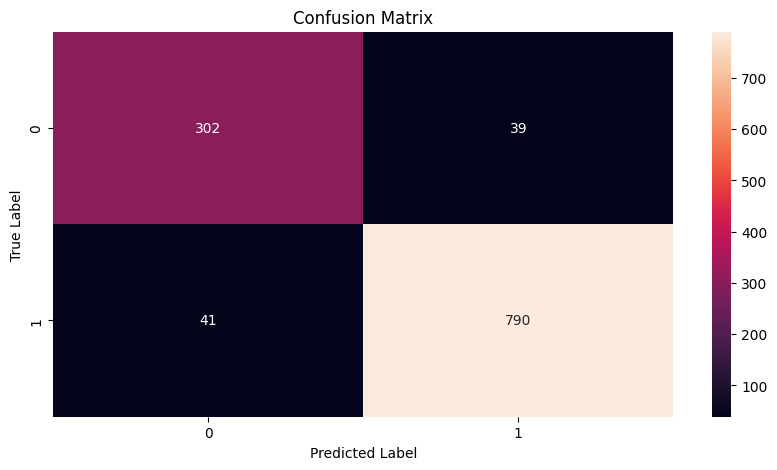

In [140]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [142]:
print("y_test shape:", y_test.shape)
print("y_test[:10]: ", y_test[:10])

y_test shape: (1172,)
y_test[:10]:  [1 1 0 0 0 1 0 1 1 1]


In [143]:
# See which we predicted correctly and which not

correct_indices = []
incorrect_indices = []
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


1092  classified correctly
80  classified incorrectly


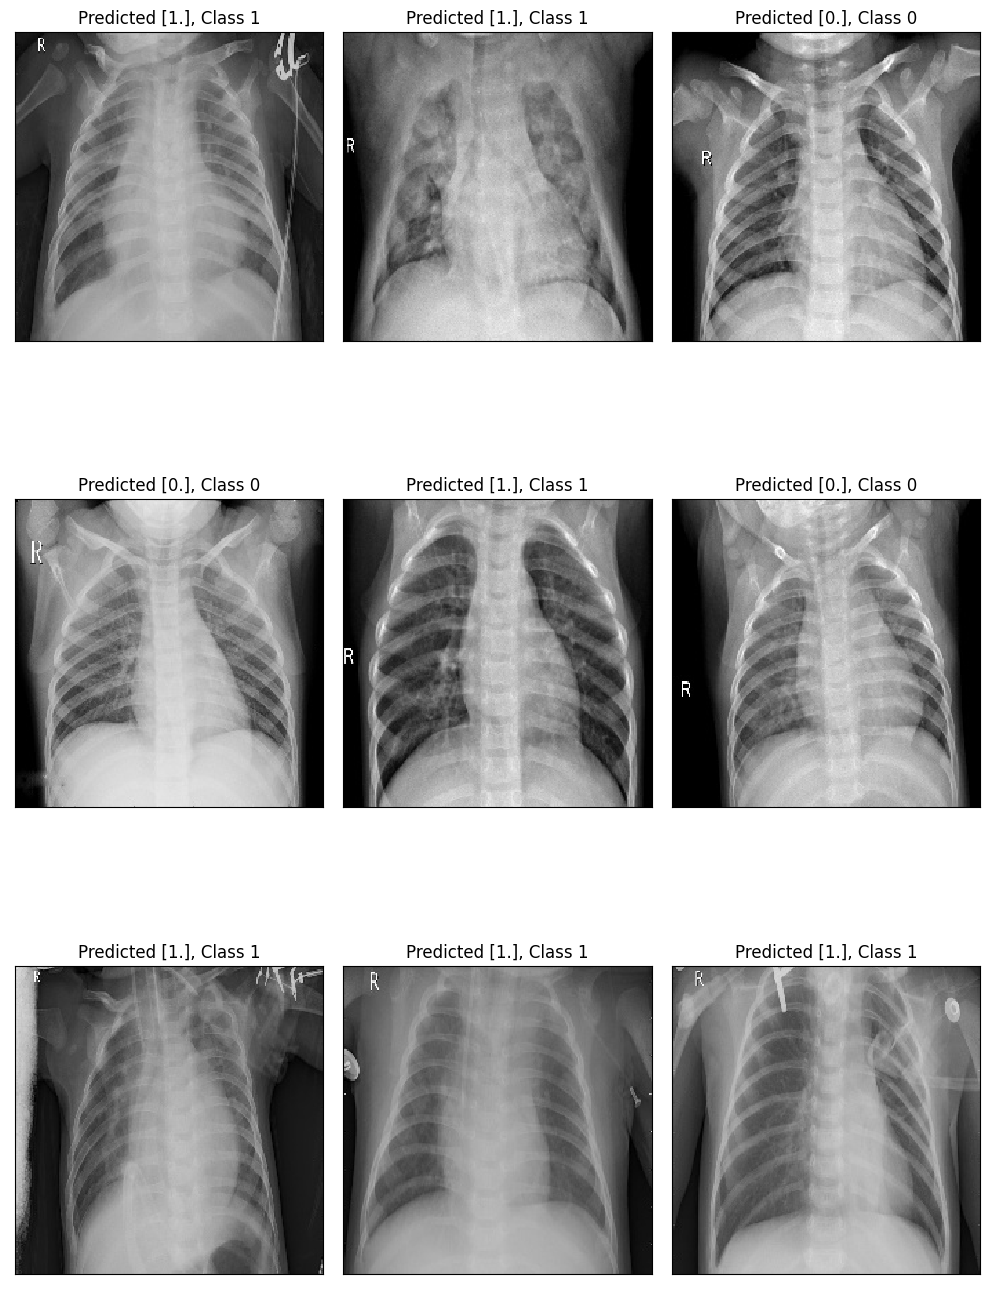

In [144]:
# Plot the first 9 correct predictions
plt.figure(figsize=(10, 15))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[correct].reshape(224, 224, 3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

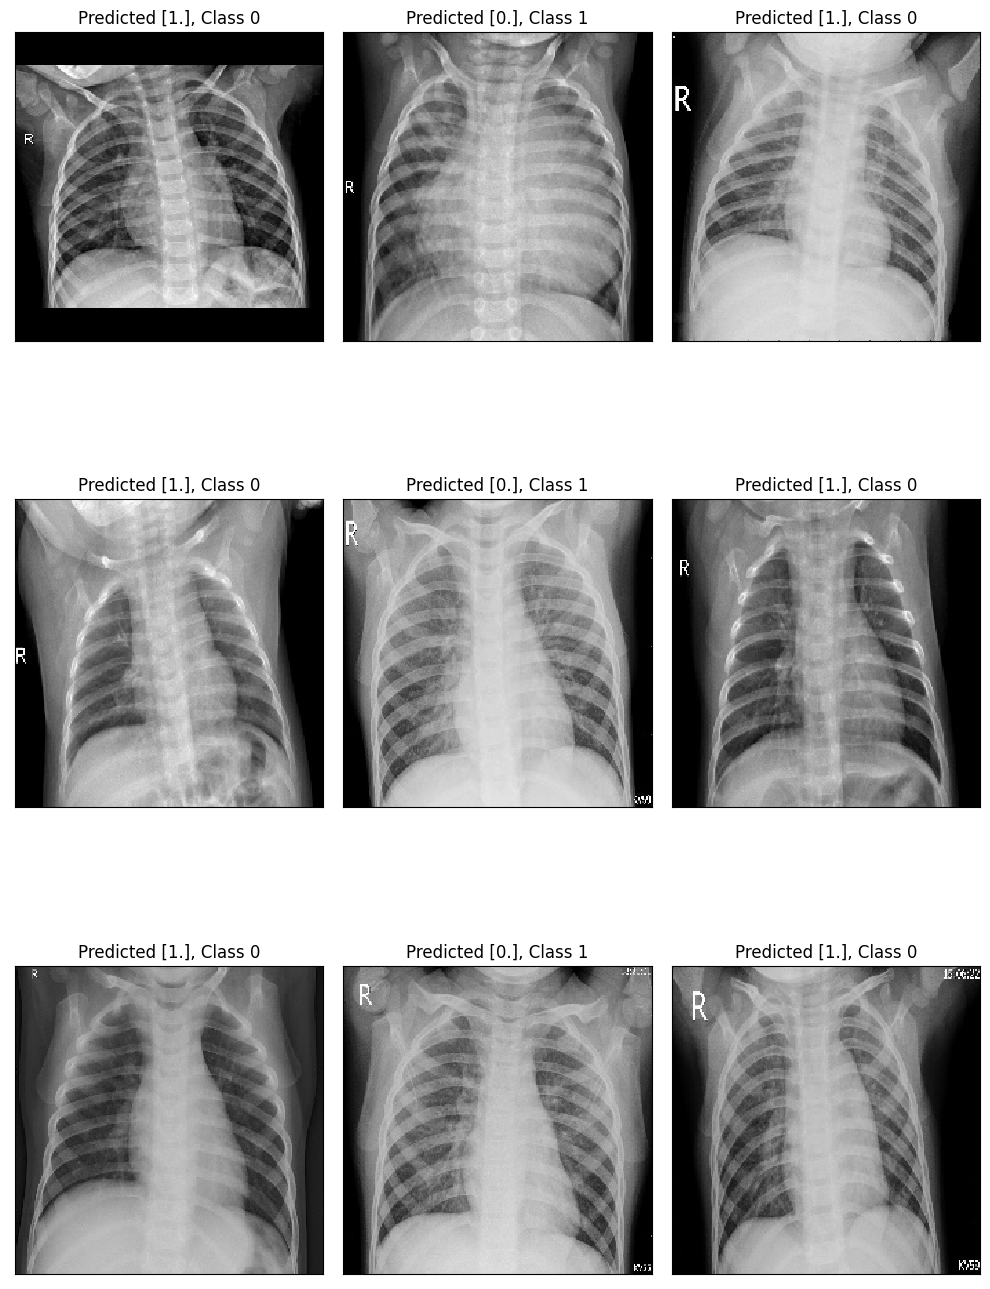

In [145]:
# Plot the first 9 incorrect predictions
plt.figure(figsize=(10, 15))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[incorrect].reshape(224, 224, 3), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[incorrect], y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()